# 1. Import data with pandas

File **FI0008900212-2018-01-01-2018-05-10.csv** contains data of the Helsinki stock market index OMX Helsinki 25 from the beginning of this year until the 10th of May. 

`read_csv()` function can take a lot of parameters, but here we only use a couple:
1. `sep=';'` means using ";" as the separator of the csv file, since by default it should be a ","
2. `header=1` indicates the first line is the csv header, which we want to exclue from the result
3. `parse_dates=['Date']` makes pandas to parse the colume "Date" into timestamps
4. `index_col='Date'` sets the "Date" column as the index, so we can benefit from pandas' time series feature.
5. `decimal=','` is a way to deal with float, as the original price columns contain float numbers like _4232,510_ 


In [2]:
import pandas as pd
data = pd.read_csv('FI0008900212-2018-01-01-2018-05-10.csv', sep=';', header=1, parse_dates=['Date'], index_col='Date', decimal=',')
data.head()

,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,
2018-05-09,4232.51,4201.23,4220.86,NaN,1,NaN,0
2018-05-08,4229.15,4184.83,4229.15,NaN,1,NaN,0
2018-05-07,4193.27,4149.39,4191.73,NaN,1,NaN,0
2018-05-04,4152.17,4107.24,4150.06,NaN,1,NaN,0
2018-05-03,4172.79,4105.29,4106.93,NaN,1,NaN,0


It's easy to a DataFrame's information, e.g. how many rows and columns it has, as well as what kind of object a column contains.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2018-05-09 to 2018-01-02
Data columns (total 7 columns):
High price       89 non-null float64
Low price        89 non-null float64
Closing price    89 non-null float64
Average price    0 non-null float64
Total volume     89 non-null int64
Turnover         0 non-null float64
Trades           89 non-null int64
dtypes: float64(5), int64(2)
memory usage: 5.6 KB


## 2. Time series 


By checking the type of the DataFrame's index, we could see it's a `DatetimeIndex`, meaning _Index of Timestamp_.

In [59]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

To select the data from a certain time range is straight-forward. Panda time seires supports partial string indexing, so if a date or a string parses to timestamps, it can be used as indexing parameters.

In [60]:
data['2018-05-09':'2018-05-01']

,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades
Date,,,,,,,
2018-05-09,4232.51,4201.23,4220.86,NaN,1,NaN,0
2018-05-08,4229.15,4184.83,4229.15,NaN,1,NaN,0
2018-05-07,4193.27,4149.39,4191.73,NaN,1,NaN,0
2018-05-04,4152.17,4107.24,4150.06,NaN,1,NaN,0
2018-05-03,4172.79,4105.29,4106.93,NaN,1,NaN,0
2018-05-02,4197.94,4154.88,4159.44,NaN,1,NaN,0


Resampling method performs a time-based grouping. It can take various reduction methods such as `mean()`, `min()` and `max()`. Here we resample the "High price" by week, and take the average price during the week period.

In [48]:
data['High price'].resample('W').mean().tail()

Date
2018-04-15    4012.430
2018-04-22    4077.886
2018-04-29    4117.574
2018-05-06    4172.045
2018-05-13    4218.310
Freq: W-SUN, Name: High price, dtype: float64

## 3. Plot

With **pyplot** it's very convenient to plot a DataFrame.

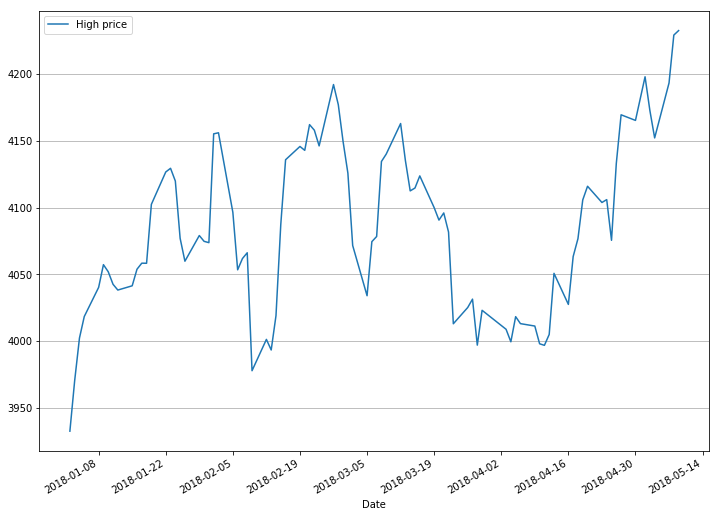

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] =(12,9)

data.plot(data.index, 'High price')
plt.gca().yaxis.grid(True)
plt.show()

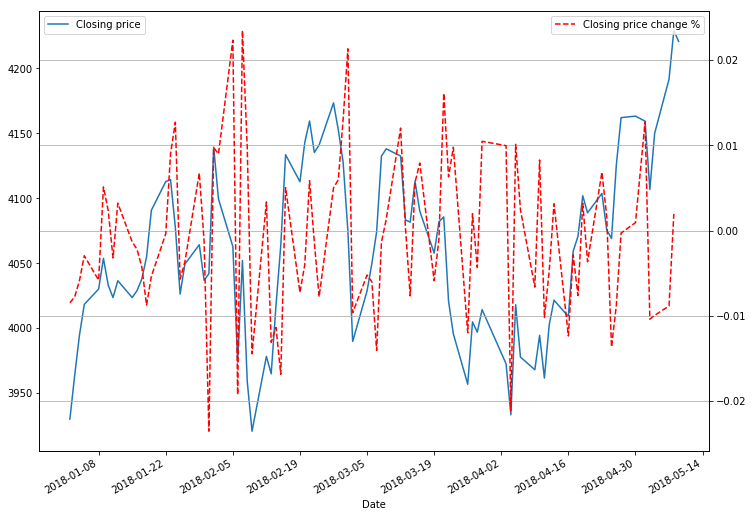

In [38]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

data.plot(data.index, 'Closing price', ax=ax1)
data.pct_change(fill_method='ffill').plot(data.index, 'Closing price', style='r--', ax=ax2, label="Closing price change %")

plt.gca().yaxis.grid(True)
plt.rcParams["figure.figsize"] =(12,9)
plt.show()